In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
import mpl_toolkits.basemap as bm
warnings.filterwarnings('ignore')


global_temp = pd.read_csv("../EVS/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    unl = global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty']
    mean_temp_world_uncertainty.append(unl.apply(lambda x: x ** 2).sum() / len(unl) ** 2)
                        

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(10, 155, 155)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


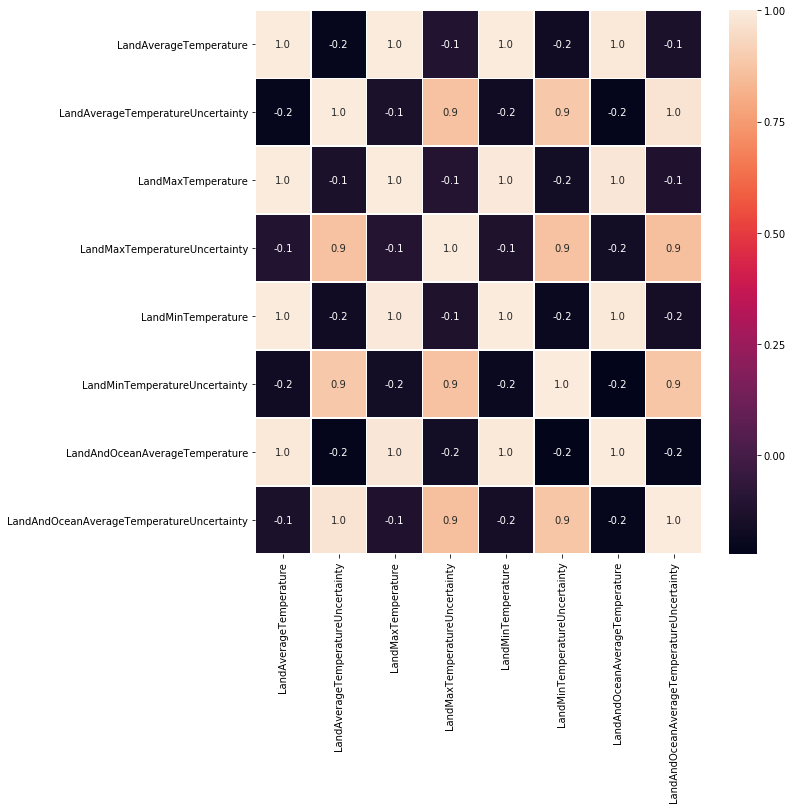

In [6]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(global_temp.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()